In [1]:
import os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D
import cmb_anomaly_utils as cau

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize']  = 12
plt.rcParams['ytick.labelsize']  = 12

def custom_save_fig(fig, **kwargs):
    mask_txt = 'masked' if kwargs['is_masked'] else'inpainted'
    fdir     = './output/plots/{}/{}/'.format(mask_txt, kwargs['geom_flag'].lower())
    fdir     = cau.output.ensure_path(fdir)
    fpath    = fdir + '{}_{}_{}_{}_mac'.format(
        mask_txt.lower(),
        kwargs['geom_flag'].lower(),
        kwargs['measure_flag'].lower(),
        kwargs['dir_cap_size'],
    )
    for ftype in ['.png', '.pdf']:
        fig.savefig(fpath + ftype, facecolor=(1,1,1,0), dpi=300, transparent=True)

### $Measures$

0.058


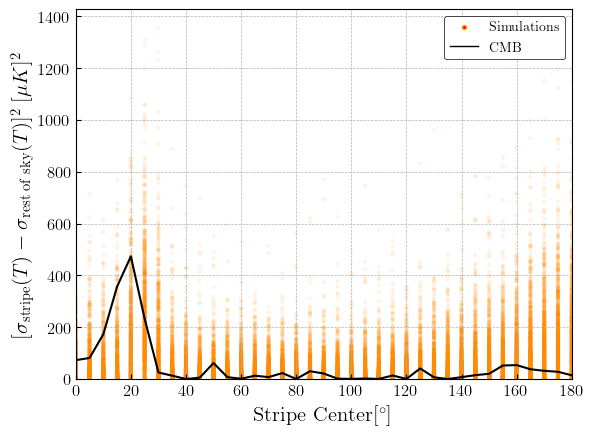

In [6]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIPE_FLAG,
'measure_flag': cau.const.D_STD2_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}
geom_range  = cau.file_reader.read_geom_range_precalc(**kwargs)
cmb_measure = cau.file_reader.read_cmb_precalc(**kwargs)
iter_sims_measure   = cau.file_reader.iter_read_sims_precalc(**kwargs)
screen = np.ones(len(geom_range), dtype=bool)
if kwargs.get('geom_flag') == cau.const.CAP_FLAG:
    screen = (15 <= geom_range) * (geom_range <= 165)

argmax   = np.argmax(cmb_measure[screen])
p_value = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # Simulations
    for sim_measure in iter_sims_measure:
        if sim_measure[screen][argmax] > cmb_measure[screen][argmax]:
            p_value += 1
        ax.scatter(geom_range[screen], sim_measure[screen],
                marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # CMB
    ax.plot(geom_range[screen], cmb_measure[screen], color='k', linewidth=1.5)
    # Labels
    ax.set_xlabel(cau.output.get_xlabel_tex(**kwargs), size=15)
    ax.set_ylabel(cau.output.get_ylabel_tex(**kwargs), size=15)
    # ax.set_title(cau.output.get_title_tex(**kwargs), y = 1.04)
    # Limits
    if kwargs.get('geom_flag') == cau.const.CAP_FLAG:
        ax.set_xlim(xmin = 15, xmax = 165)
    else:
        ax.set_xlim(xmin = 0, xmax = 180)
    if kwargs.get('measure_flag') in [cau.const.D_STD2_FLAG, cau.const.NORM_D_STD2_FLAG, cau.const.D_CORR2_FLAG]:
        ax.set_ylim(ymin = 0)
    # ax.set_ylim(ymin = 0, ymax = .1250)
    # Legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-', color='k', lw=1),
        ]
    ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    custom_save_fig(fig, **kwargs)

print(p_value / 1000)
plt.show()

### $Internal$  $A_l$

bigger l=7: 121
smaller l=12: 80
weird sims: 16


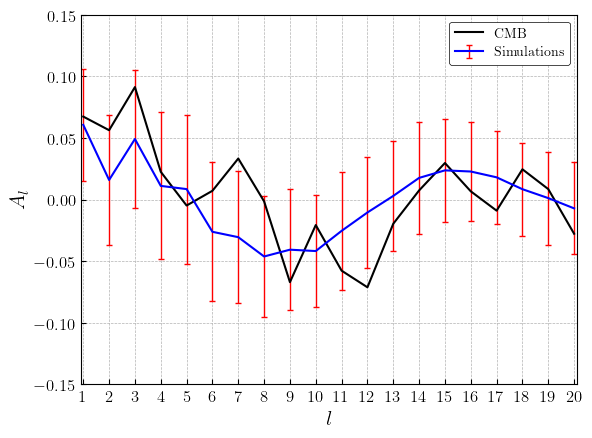

In [5]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIPE_FLAG,
'measure_flag': cau.const.STD_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}

plt_mode = 'errorbar' #scatter

cmb_a_l     = cau.file_reader.read_cmb_a_l(**kwargs)
l_range  = np.arange(len(cmb_a_l))
iter_sims_a_l   = cau.file_reader.iter_read_sims_a_l(**kwargs)

n_weird_sim = 0
n_seven = 0
n_twelve = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    if plt_mode == 'scatter':
        # Simulations
        for sim_measure in iter_sims_a_l:
            condition1 = sim_measure[7] > cmb_a_l[7]
            condition2 = sim_measure[12] < cmb_a_l[12]
            if condition1:
                n_seven += 1
            if condition2:
                n_twelve += 1
            if condition1 and condition2:
                n_weird_sim += 1
            ax.scatter(l_range[1:], sim_measure[1:],
                    marker = '.', edgecolors = 'none', linewidths = 1,
                    c = 'blue' if condition1 and condition2 else 'darkorange',
                    alpha = 1 if condition1 and condition2 else .1)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5)
        # Legends
        sample_curves = [
            Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
            Line2D([0], [0], ls='-', color='k', lw=1),
            ]
        ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    if plt_mode == 'errorbar':
        # Simulations
        sims_a_l = []
        for sim_measure in iter_sims_a_l:
            sims_a_l.append(sim_measure)
            condition1 = sim_measure[7] > cmb_a_l[7]
            condition2 = sim_measure[12] < cmb_a_l[12]
            if condition1:
                n_seven += 1
            if condition2:
                n_twelve += 1
            if condition1 and condition2:
                n_weird_sim += 1
        sims_a_l = np.array(sims_a_l)
        ax.errorbar(l_range[1:], np.mean(sims_a_l, axis=0)[1:], np.std(sims_a_l, axis=0)[1:],
                    color='blue', linewidth=1.5, linestyle='-', label = r'Simulations',
                    ecolor='red', elinewidth=1, capsize = 2)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5, label = r'CMB')
        # Legends
        ax.legend(loc=1)
    # Labels
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    # ax.set_title(r'\boldmath{$A_l$} \textbf{vs.} \boldmath{$l$} for $\sigma_{stripe}(T)$', y = 1.04)
    ax.set_facecolor('white')
    # Limits
    ax.set_xlim(xmin = 1 - 0.1, xmax = l_range[-1] + 0.1)
    ax.set_ylim(ymin = - 0.15, ymax = 0.15)
    ax.set_xticks(l_range[1:])
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    fpath = './output/plots/inpainted/stripe/a_l_{}_stripe_std_{}mac'.format(
        plt_mode,
        str(int(kwargs['dir_cap_size']))
        )
    fig.savefig(f'{fpath}.pdf', facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig(f'{fpath}.png', facecolor=(1,1,1,0), dpi=300, transparent=True)

print(f"bigger l=7: {n_seven}")
print(f"smaller l=12: {n_twelve}")
print(f"weird sims: {n_weird_sim}")
plt.show()

### $Modulated$  $A_l$

bigger l=7: 0
smaller l=12: 0
weird sims: 0


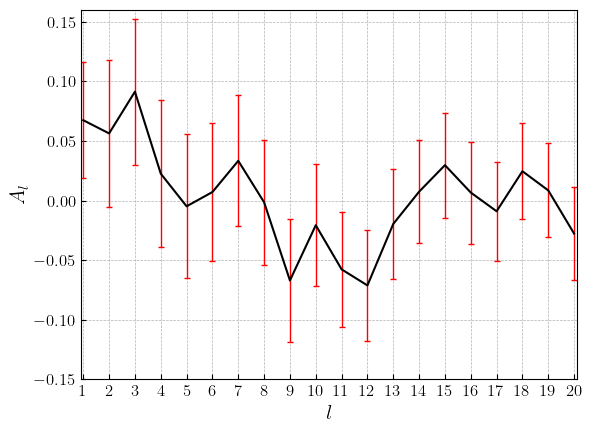

l   = 1
a_l = 0.067
err = 0.049

l   = 2
a_l = 0.056
err = 0.061

l   = 3
a_l = 0.091
err = 0.061

l   = 4
a_l = 0.023
err = 0.061

l   = 5
a_l = -0.0048
err = 0.06

l   = 6
a_l = 0.0071
err = 0.058

l   = 7
a_l = 0.033
err = 0.055

l   = 8
a_l = -0.0015
err = 0.052

l   = 9
a_l = -0.067
err = 0.052

l   = 10
a_l = -0.021
err = 0.051

l   = 11
a_l = -0.058
err = 0.048

l   = 12
a_l = -0.071
err = 0.047

l   = 13
a_l = -0.02
err = 0.046

l   = 14
a_l = 0.0074
err = 0.043

l   = 15
a_l = 0.03
err = 0.044

l   = 16
a_l = 0.0067
err = 0.043

l   = 17
a_l = -0.009
err = 0.042

l   = 18
a_l = 0.025
err = 0.04

l   = 19
a_l = 0.0085
err = 0.039

l   = 20
a_l = -0.028
err = 0.039



In [3]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIPE_FLAG,
'measure_flag': cau.const.STD_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}

plt_mode = 'errorbar' #scatter

cmb_a_l  = cau.file_reader.read_cmb_a_l(**kwargs)
l_range  = np.arange(len(cmb_a_l))
sims_a_l = np.loadtxt('./output/sims_modulated_a_l.txt')

n_weird_sim = 0
n_seven = 0
n_twelve = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    if plt_mode == 'scatter':
        # Simulations
        for sim_measure in iter_sims_a_l:
            condition1 = sim_measure[7] > cmb_a_l[7]
            condition2 = sim_measure[12] < cmb_a_l[12]
            if condition1:
                n_seven += 1
            if condition2:
                n_twelve += 1
            if condition1 and condition2:
                n_weird_sim += 1
            ax.scatter(l_range[1:], sim_measure[1:],
                    marker = '.', edgecolors = 'none', linewidths = 1,
                    c = 'red' if condition1 and condition2 else 'darkorange',
                    alpha = 1 if condition1 and condition2 else .1)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5)
        # Legends
        sample_curves = [
            Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
            Line2D([0], [0], ls='-', color='k', lw=1),
            ]
        ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    if plt_mode == 'errorbar':
        # ax.errorbar(l_range[1:], np.mean(sims_a_l, axis=0)[1:], np.std(sims_a_l, axis=0)[1:],
        ax.errorbar(l_range[1:], cmb_a_l[1:], np.std(sims_a_l, axis=0)[1:],
                    color='black', linewidth=1.5, linestyle='-', label = r'Simulations',
                    ecolor='red', elinewidth=1, capsize = 2)
        # CMB
        # ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5, label = r'CMB')
        # Legends
        # ax.legend(loc=1)
    # Labels
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    # ax.set_title(r'\boldmath{$A_l$} \textbf{vs.} \boldmath{$l$} for $\sigma_{stripe}(T)$', y = 1.04)
    ax.set_facecolor('white')
    # Limits
    ax.set_xlim(xmin = 1 - 0.1, xmax = l_range[-1] + 0.1)
    ax.set_ylim(ymin = - 0.15, ymax = 0.16)
    ax.set_xticks(l_range[1:])
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    fpath = './output/plots/inpainted/stripe/a_l_modulated_{}_stripe_std_{}mac'.format(
        plt_mode,
        str(int(kwargs['dir_cap_size']))
        )
    fig.savefig(f'{fpath}.pdf', facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig(f'{fpath}.png', facecolor=(1,1,1,0), dpi=300, transparent=True)

print(f"bigger l=7: {n_seven}")
print(f"smaller l=12: {n_twelve}")
print(f"weird sims: {n_weird_sim}")
plt.show()

for _l, _a_l, _delta_a_l in zip(l_range[1:], cmb_a_l[1:], np.std(sims_a_l, axis=0)[1:]):
    print("l   = {}\na_l = {:.2}\nerr = {:.2}\n".format(_l, _a_l, _delta_a_l))

### $Legendre$ $Expansion$

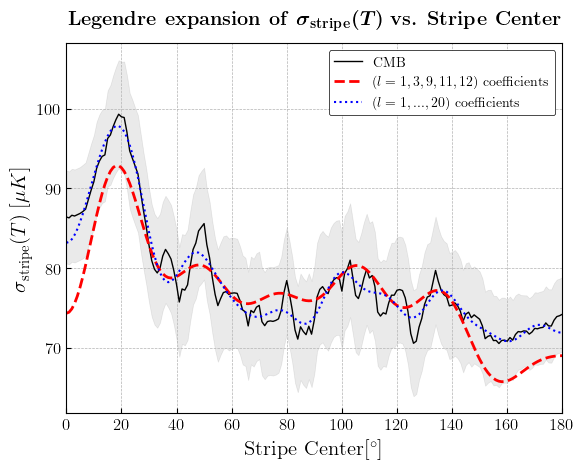

In [2]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIPE_FLAG,
'measure_flag': cau.const.STD_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}

plt_mode = 'errorbar' #scatter

cmb_a_l  = cau.file_reader.read_cmb_a_l(**kwargs)
l_range  = np.arange(len(cmb_a_l))
geom_range  = cau.file_reader.read_geom_range_precalc(**kwargs)
cmb_measure = cau.file_reader.read_cmb_precalc(**kwargs)
sims_measure = np.loadtxt("./output/sims_modulated_measures.txt")
sims_std    = np.std(sims_measure, axis=0)

monopole = np.mean(cmb_measure)

nonzero_a_l = np.zeros(len(cmb_a_l))
nonzero_a_l[0]  = cmb_a_l[0]
nonzero_a_l[1]  = cmb_a_l[1]
nonzero_a_l[3]  = cmb_a_l[3]
nonzero_a_l[9]  = cmb_a_l[9]
nonzero_a_l[11] = cmb_a_l[11]
nonzero_a_l[12] = cmb_a_l[12]

cos_theta = np.cos(np.radians(geom_range))

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(geom_range, cmb_measure - sims_std, cmb_measure + sims_std, color = (0.2,0.2,0.2, 0.1))
    # cmb
    ax.plot(geom_range, cmb_measure,
            color='k', linewidth=1, label=r'CMB')
    # cmb legendre nonzero a_l
    al_pl_nonzero = np.array([nonzero_a_l[l] * cau.math_utils.legendre(l, cos_theta) for l in l_range])
    ax.plot(geom_range, monopole * np.sum(al_pl_nonzero, axis=0),
            color='r',linestyle='--', lw=2, label=r'($l=1, 3, 9, 11, 12$) coefficients')
#     # cmb legendre all a_l
    al_pl_all = np.array([cmb_a_l[l] * cau.math_utils.legendre(l, cos_theta) for l in l_range])
    ax.plot(geom_range, monopole * np.sum(al_pl_all, axis=0),
            linewidth=1.5, color='b',linestyle=':', label = r'($l=1, ..., 20$) coefficients')
    ax.set_xlabel(r'Stripe Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{stripe}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\textbf{Legendre expansion of }'+ r'\boldmath{{{}}}'.format(measure_text) + \
                r' \textbf{vs. Stripe Center}',
                 y=1.03)
    ax.legend()
    ax.set_facecolor('white')
    # Limits
    ax.set_xlim(xmin = 0, xmax = 180)
#     ax.set_ylim(ymin = - 0.2, ymax = 0.2)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    fpath = './output/plots/inpainted/stripe/stripe_std_vs_legendre_expansion'
    fig.savefig(f'{fpath}.pdf', facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig(f'{fpath}.png', facecolor=(1,1,1,0), dpi=300, transparent=True)
plt.show()

### $Direction$ $Plot$

In [3]:
all_dir_cap_anom = np.loadtxt("./output/cmb_inpainted_all_dir_cap_anom.txt")
dir_geom_range = cau.stat_utils.get_range(10, 90, 5)
nside = cau.coords.get_nside(len(all_dir_cap_anom))

dipole_pix = cau.coords.get_pix_by_ang(nside, -20, 221)

# Maps
map_acc = np.sum(all_dir_cap_anom, axis = 1)

index_30 = cau.stat_utils.find_nearest_index(dir_geom_range, 30)
map_30  = all_dir_cap_anom[:, index_30]

selected_map = map_acc

# Values for color map range 
min_val = np.min(selected_map)
max_val = np.max(selected_map)
sigma_ratio = np.std(selected_map) / (max_val - min_val)
t_filter = cau.stat_utils.get_top_cut_filter(map_acc, sigma_ratio)
selected_map[np.logical_not(t_filter)] = np.nan


with plt.style.context('bmh'):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5.5,True)
    hp.newvisufunc.projview(
        selected_map,
        fig=1,
        coord=["G"],
        graticule=True,
        graticule_labels=True,
        cbar=False,
        cmap="jet",
        min=min_val,
        max=max_val,
        title = r"\textbf{Direction of Anomaly}",
        fontsize={
            "xlabel": 25,
            "ylabel": 25,
            "xtick_label": 20,
            "ytick_label": 20,
            "title": 25,
        },
        xtick_label_color="k",
        ytick_label_color="k",
        hold=True,
        # xlabel="longitude",
        # ylabel="latitude",
        cb_orientation="horizontal",
        projection_type="mollweide",
    )

    # Planck direction
    col_planck = "b"
    hp.newvisufunc.newprojplot(theta=np.radians(110),
                            phi=np.radians(221-360),
                            marker="o", color=col_planck, markersize=10)

    plt.annotate(r"\textbf{Planck-2018}",
                (1.6, -0.6), color=col_planck, fontsize=20)

    # Our direction (dir of max)
    col_ours = "lightgreen"

    lat, lon = cau.direction.find_dir_by_mac(all_dir_cap_anom, 30, dir_geom_range)
    print("({:.2f}, {:.2f})".format(lat, lon))

    hp.newvisufunc.newprojplot(theta=np.radians(90 - lat),
                            phi=np.radians(lon-360),
                            marker="o", color=col_ours, markersize=10)

    plt.annotate(r"\textbf{Max\:SD\:of\:\boldmath{$30^\circ$}caps}",
                (1.1, -0.15), color=col_ours, fontsize=20)

    # Save
    # plt.gcf().set_size_inches(12,5.355)
    print(plt.gcf().get_size_inches())

    fig.savefig("./output/plots/inpainted/cap/direction_of_anomaly.png",
                facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig("./output/plots/inpainted/cap/direction_of_anomaly.pdf",
                facecolor=(1,1,1,0), dpi=300, transparent=True)
    # fig.show()

(-12.02, 219.38)
[10.   5.5]
